<a href="https://colab.research.google.com/github/ckbjimmy/2019_bt/blob/master/bt2_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Clinical Data Analysis

We would like to introduce basic machine learning techniques and toolkits for clinical knowledge discovery in the workshop.
The material will cover common useful algorithms for clinical prediction tasks, as well as the diagnostic workflow of applying machine learning to real-world problems. 
We will use [Google colab](https://colab.research.google.com/) / python jupyter notebook and two datasets:

- Breast Cancer Wisconsin (Diagnostic) Database, and 
- pre-extracted ICU data from PhysioNet Database
  
to build predictive models.

The learning objectives of this workshop tutorial are:

- Learn how to use Google colab / jupyter notebook
- Learn how to build machine learning models for clinical classification and/or clustering tasks

To accelerate the progress without obstacles, we hope that the readers fulfill the following prerequisites:

- [Skillset] basic python syntax
- [Requirements] Google account OR [anaconda](https://anaconda.org/anaconda/python)

In part 1, we will go through the basic of machine learning for classification problems.
In part 2, we will play with neural networks.

# Classification problem

## Deep learning / Deep neural network

Deep learning is a group of machine learning algorithms that specifically focuses on utilizing neural network architecture.
The neural network approach attempt to mimic the function of biological neurons by stacking layers of neuron units that can pass information.
The network will pass the inforamtion back and forth to adjust the weights of neuron units using backpropagation algorithm based on the objective function (loss function, criterion) that we provide.

The advantages of using deep learning approach includes:
- Modularization
- Universality theorem (one hidden layer is enough, but much effective while deeper)
- End-to-end learning (less feature engineering---if you don't know what features are important at all)

![adv](https://raw.githubusercontent.com/ckbjimmy/2019_bt/master/img/adv.png)

[Source] Courtesy by Prof. HY Lee (NTU)

However, there are still some cons of using deep neural networks such as interpretability and heavy computation.

As a promising algorithmic approach for predictive analytics (and also the hype of deep learning), we would like to introduce you how to use deep neural networks for clinical machine learning problems.

The mathematical details of neural network approach will not be emphasized in the tutorial.
The foundation of deep neural network is using **gradient descent** to update parameters, and all gradients are computed by **backpropagation algorithm**.
Please refer to [Deep Learning book by Goodfellow et al.](http:/www.deeplearningbook.org/) for detailed information.  

To build the neural network without too much efforts in python, we adopt the high-level python deep learning API, **Keras**, to train neural networks.

After going through this tutorial, we hope that you will understand how to use keras to design and build simple neural network for classification problems, and how to evaluate the keras neural network models.

In this tutorial, we directly use the most complicated data, PhysioNet dataset, as an example to demonstrate the performance of deep learning models.
Please refer to tutorial Part I for all details of data preprocessing.

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/ckbjimmy/2019_bt/master/data/PhysionetChallenge2012_data.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

Before training neural network, we need to do some transformations for our data.

In [0]:
X = Imputer(missing_values='NaN', strategy='mean', axis=0).fit(X).transform(X)
X = StandardScaler().fit(X).transform(X)

# Encoding Categorical Data
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Next, we import keras modules and construct a very simple three-layer neural network architecture with input, hidden and output layers.

In [0]:
!pip install keras --upgrade
import keras
from keras.models import Sequential
from keras.layers import Dense

try:
    import pydot
except:
    !pip install pydot
    
try:
    import graphviz
except:
    !apt-get install graphviz -y
    
from keras.utils.vis_utils import plot_model
from IPython.display import Image

keras.__version__

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.0)
Requirement not upgraded as not directly required: h5py in /usr/local/lib/python3.6/dist-packages (from keras) (2.8.0)
Requirement not upgraded as not directly required: scipy>=0.14 in /usr/local/lib/python3.6/dist-packages (from keras) (0.19.1)
Requirement not upgraded as not directly required: keras-preprocessing==1.0.1 in /usr/local/lib/python3.6/dist-packages (from keras) (1.0.1)
Requirement not upgraded as not directly required: six>=1.9.0 in /usr/local/lib/python3.6/dist-packages (from keras) (1.11.0)
Requirement not upgraded as not directly required: keras-applications==1.0.2 in /usr/local/lib/python3.6/dist-packages (from keras) (1.0.2)
Requirement not upgraded as not directly required: pyyaml in /usr/local/lib/python3.6/dist-packages (from keras) (3.12)
Requirement not upgraded as not directly required: numpy>=1.9.1 in /usr/local/lib/python3.6/dist-packages (from keras) (1.14.5)


Using TensorFlow backend.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


'2.2.0'

There are many variants of deep neural networks.

![nn](https://raw.githubusercontent.com/ckbjimmy/2019_bt/master/img/nn.png)

[Source] Deep Learning, Chapter 1 (Goodfellow, 2016)

We will start from the simplest one, feedforward neural network, which is similar to the neural network architecture shown in the following figure.

![nn](https://cdn-images-1.medium.com/max/1600/1*QVIyc5HnGDWTNX3m-nIm9w.png)

[Source] https://medium.com/@curiousily/tensorflow-for-hackers-part-iv-neural-network-from-scratch-1a4f504dfa8

In our first neural network model, we will construct the one that

- take the input and pass them into the 64-dimension first hidden layer, 
- take the output of the first layer and pass them into the  8-dimension second layer,
- take the output of the second layer and pass them into the last layer for prediction,
- the output of the last layer is the prediction.

One more hidden layer than the above figure.

In keras, we use `Sequential()` as the skeleton of the neural network model, and sequentially add the layer on it.
After building the layers, we need to compile the model and defined the optimizer, loss function and evaluation metrics to optimize our model.
In this example, we use the optimizer called `adam`, to minimize the value of loss function `binary_crossentropy` (if you work on the regression problem, remember to change to `mse`), and judge by accuracy.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                11712     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 12,241
Trainable params: 12,241
Non-trainable params: 0
_________________________________________________________________
None


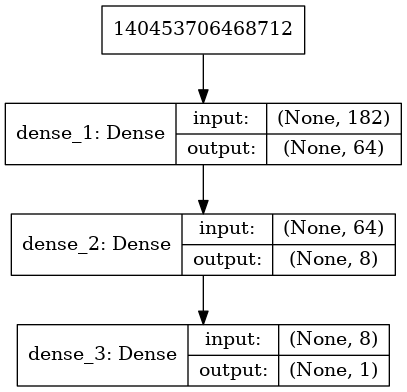

In [0]:
# initialize neural network
clf = Sequential()

# first hidden layer for input data
clf.add(Dense(units=64, 
              kernel_initializer='uniform',
              activation='relu', 
              input_dim=X.shape[1]))

# second hidden layer
clf.add(Dense(units=8, 
              kernel_initializer='uniform', 
              activation='relu'))

# the last hidden layer for output
clf.add(Dense(units=1, 
              kernel_initializer='uniform', 
              activation='sigmoid'))

# compile the network
clf.compile(optimizer='adam', 
            loss='binary_crossentropy', 
            metrics=['accuracy'])


print(clf.summary())

plot_model(clf, to_file='clf.png', show_shapes=True, show_layer_names=True)
Image('clf.png')

Then, it's time to train the model!
Smaller batch size usually yields better performance, yet with slow speed.
The epoch size of $n$ means that the algorithm will go through whole dataset $n$ times.

After training, we visualize the training history and see how the accuracy and loss went during the process.
We also use confusion matrix and **pycm** for computing the performance.


In [0]:
# fit model
history = clf.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=100,
                    epochs=20, 
                    verbose=1)

Train on 2560 samples, validate on 640 samples
Epoch 1/20
2560/2560 [==============================] - 0s 96us/step - loss: 0.6743 - acc: 0.8340 - val_loss: 0.6330 - val_acc: 0.8734
Epoch 2/20
2560/2560 [==============================] - 0s 19us/step - loss: 0.5472 - acc: 0.8625 - val_loss: 0.4188 - val_acc: 0.8734
Epoch 3/20
2560/2560 [==============================] - 0s 20us/step - loss: 0.3675 - acc: 0.8625 - val_loss: 0.3155 - val_acc: 0.8734
Epoch 4/20
2560/2560 [==============================] - 0s 28us/step - loss: 0.3206 - acc: 0.8625 - val_loss: 0.3010 - val_acc: 0.8734
Epoch 5/20
2560/2560 [==============================] - 0s 19us/step - loss: 0.3040 - acc: 0.8625 - val_loss: 0.2937 - val_acc: 0.8734
Epoch 6/20
2560/2560 [==============================] - 0s 19us/step - loss: 0.2929 - acc: 0.8625 - val_loss: 0.2900 - val_acc: 0.8734
Epoch 7/20
2560/2560 [==============================] - 0s 21us/step - loss: 0.2842 - acc: 0.8625 - val_loss: 0.2879 - val_acc: 0.8734
Epoch 8/

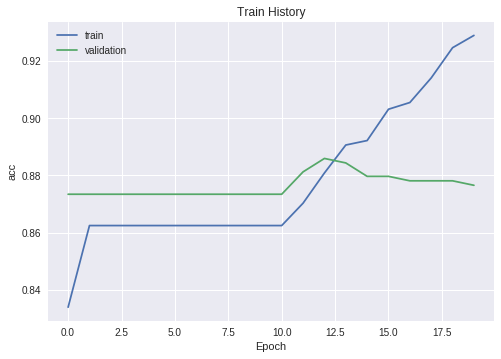

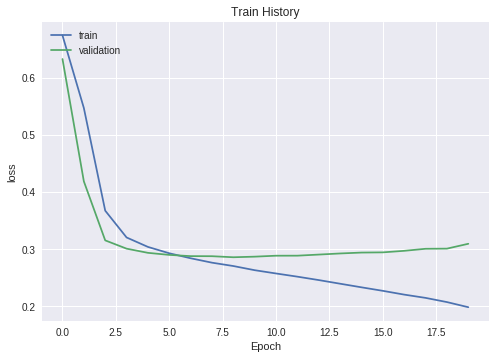

In [0]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])   
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 
    
show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

In [0]:
# we use the trained model to predict the label of test set
y_pred = clf.predict(X_test)
y_pred = [1 if i[0] > 0.5 else 0 for i in y_pred]

# show the performance using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
print(cm)

[[658  21]
 [ 89  32]]


In [0]:
# we use pycm to show the performance
!pip install pycm
from pycm import *

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)
print(cm)

    100% |████████████████████████████████| 204kB 8.4MB/s 
    100% |████████████████████████████████| 184kB 10.1MB/s 
    100% |████████████████████████████████| 204kB 11.5MB/s 
    100% |████████████████████████████████| 51kB 19.4MB/s 
art 1.5 has requirement setuptools==39.2.0, but you'll have setuptools 39.1.0 which is incompatible.
Predict          0        1        
Actual
0                658      21       
1                89       32       




Overall Statistics : 

95% CI                                                           (0.83864,0.88636)
Bennett_S                                                        0.725
Chi-Squared                                                      None
Chi-Squared DF                                                   1
Conditional Entropy                                              None
Cramer_V                                                         None
Cross Entropy                                                    0.67622
Gwet_AC1       

After seeing a simple example, we discuss more about the network.
Normally, when building a neural network, we will do the following steps:

### Define a set of function (Network architecture)
We can see that the neuron unit can be regarded as a logistic regression-like operation.
In general, the unit will do `activation_function(weight * input + bias)` computation.

![ff](https://raw.githubusercontent.com/ckbjimmy/2019_bt/master/img/ff.png)

[Source] Courtesy by Prof. HY Lee (NTU)

In the feedforward model, the layer function we used is `Dense` (fully-connected layer).
For the `Dense` layer, you need to assign the input size, output size (`units`), and the activation function.
For activation function, you can try the following options: `softplus`, `softsign`, `relu`, `tanh`, `sigmoid`, `hard_sigmoid`, `linear`, depends on your needs.
However, `relu` are the most commonly used functions for intermediate layers, and `sigmoid`/`softmax` for the last layer (binary/multiclass).

Multiple hidden layers are good, but there is no theorerical consensus how many layers / how many neurons / what hyperparameters you need to use to get the best performance. (That's why some people think that deep learning approach has become [alchemy](https://www.reddit.com/r/compsci/comments/7jiipp/lecun_vs_rahimi_has_machine_learning_become/))

![stack](https://1.bp.blogspot.com/-gZ7UBZ-wiBE/WZU12kj6wDI/AAAAAAAAKNQ/U8998PG8U30fgzZUWVtQhzl5fpVlCxnSwCLcBGAs/s1600/layers.jpg))

[Source] http://www.cl.cam.ac.uk/~pv273/slides/LOSSlides.pdf

### Goodness of function (Define loss)
The goal of prediction is to minimize the difference between the predicted value and the ground truth label. 
We need to decide how to compute the difference between them, we call this "objective" in deep learning.

![loss](https://raw.githubusercontent.com/ckbjimmy/2019_bt/master/img/loss.png)

[Source] Courtesy by Prof. HY Lee (NTU)

In the first case, we will use `binary_crossentropy` for the binary classification task. 
For more objectives, please refer to the [keras document](https://keras.io/objectives/).

### [Optional] Choose the best function (Optimization and parameter setting)
We also need to decide which optimizer will be used in the network. 
The commonly used optimizers include: `SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam`.
The backpropagation algorithm will use the selected optimizer to minimize the objective (loss) function we defined previously.
Finally, we need to decide the parameters `batch_size` and `epochs` for training. 
Batch size influences the speed and performance so you have to tune it and do some experiments.
If you have $1000$ training samples and set `batch_size=50`, then in one epoch (going through all training samples once) you need to update parameters for $\frac{1000}{50}=20$ times, until all "mini-batches" are picked.

For prediction, you can simply use `model.evaluate()` to get the performance metrics, and use `model.predict()` to obtain the predicted results.

### [Optional] Exercise of regularization
Regularization is a pratical way to prevent from overfitting problem. 
You may try to add `BatchNormalization` (batch normalization) or `Dropout` (dropout) layers and see whether they will be helpful for modeling.




## Exercise

Now try to play with the breast cancer dataset and see whether deep neural network works well on the smaller dataset.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
None
Train on 364 samples, validate on 91 samples
Epoch 1/50
364/364 [==============================] - 0s 679us/step - loss: 0.6901 - acc: 0.3462 - val_loss: 0.6836 - val_acc: 0.3626
Epoch 2/50
364/364 [==============================] - 0s 35us/step - loss: 0.6830 - acc: 0.3736 - val_loss: 0.6825 - val_acc: 0.3626
Epoch 3/50
364/364 [==============================] - 0s 28us/step - loss: 0.6771 - acc: 0.

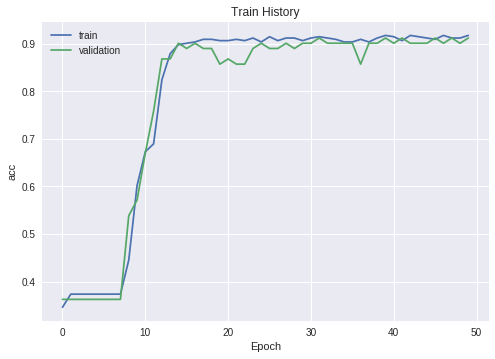

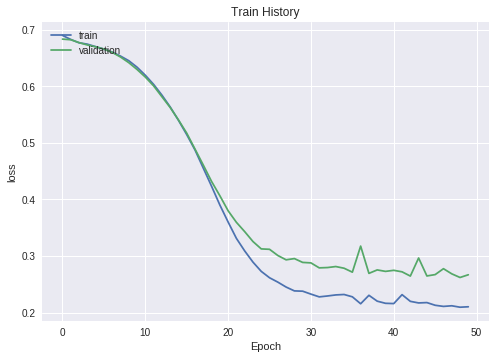

Predict          0        1        
Actual
0                40       3        
1                0        71       




Overall Statistics : 

95% CI                                                           (0.9443,1.00307)
Bennett_S                                                        0.94737
Chi-Squared                                                      None
Chi-Squared DF                                                   1
Conditional Entropy                                              None
Cramer_V                                                         None
Cross Entropy                                                    0.9582
Gwet_AC1                                                         0.95099
Joint Entropy                                                    None
KL Divergence                                                    0.00217
Kappa                                                            0.94321
Kappa 95% CI                                                     

In [0]:
from sklearn import datasets

df_bc = datasets.load_breast_cancer()
X = df_bc['data']
y = df_bc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf = Sequential()
clf.add(Dense(units=16, 
              kernel_initializer='uniform',
              activation='relu', 
              input_dim=X.shape[1]))
clf.add(Dense(units=16, 
              kernel_initializer='uniform', 
              activation='relu'))
clf.add(Dense(units=1, 
              kernel_initializer='uniform', 
              activation='sigmoid'))
clf.compile(optimizer='adam', 
            loss='binary_crossentropy', 
            metrics=['accuracy'])
print(clf.summary())

history = clf.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=100,
                    epochs=50, 
                    verbose=1)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

y_pred = clf.predict(X_test)
y_pred = [1 if i[0] > 0.5 else 0 for i in y_pred]

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)
print(cm)

## Further reading

### Theory and mathematics
- [Deep learning book](http://www.deeplearningbook.org/)
- [Stanford CS224n: Natural Language Processing with Deep Learning](http://web.stanford.edu/class/cs224n/)
- [Stanford CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/)

### Practical
You may want to read the documents of TensorFlow, PyTorch, Keras, Scikit-learn, ... etc. to know how to use them.

- [Tensorflow Programmer's Guide](https://www.tensorflow.org/programmers_guide/)
- [PyTorch Tutorials](https://pytorch.org/tutorials/)
- [Coursera Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning)
- [Google Machine Learning Crash Course
](https://developers.google.com/machine-learning/crash-course/ml-intro)
- [Coursera Machine Learning with TensorFlow on Google Cloud Platform Specialization](https://www.coursera.org/specializations/machine-learning-tensorflow-gcp)